In [26]:
#imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics as mt
import math
from sklearn import tree as tr
from sklearn import ensemble as en
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AffinityPropagation
import time
from IPython import display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model as lm
from sklearn import preprocessing as pp
from sklearn import cluster as ct
from sklearn.preprocessing import StandardScaler


In [96]:
#database Classificacao
X_test = pd.read_csv('database/Classificacao/X_test.csv')
X_train = pd.read_csv('database/Classificacao/X_training.csv')
X_val = pd.read_csv('database/Classificacao/X_validation.csv')
y_test = pd.read_csv('database/Classificacao/y_test.csv')
y_train = pd.read_csv('database/Classificacao/y_training.csv')
y_val = pd.read_csv('database/Classificacao/y_validation.csv')

# KNN

In [9]:
# Start
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [14]:
# Performance Training
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 0.8321864441839619, precision = 0.8319127268564236, recall = 0.8321864441839619, f1 = 0.8319983563271529


In [16]:
# Finding the best K
best_score = 0
best_k = 0

for k in range(3,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    f1 = f1_score(y_val, y_pred_val, average='weighted')

    if f1 > best_score:
        best_score = f1
        best_k = k

print('O melhor k é {} com o f1-score igual a: {}'.format(best_k, best_score))

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

O melhor k é 3 com o f1-score igual a: 0.6760703187504783


In [20]:
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='weighted')
recall = recall_score(y_val, y_pred_val, average='weighted')
# Performance Validation
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 0.6489912802857235, precision = 0.6453751329774354, recall = 0.6489912802857235, f1 = 0.639391684350039


In [21]:
# Agrupando os dados de train e val para validar o teste
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

In [23]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_final, y_train_final)

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [24]:
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
# Performance test
print(f"Acurácia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1-Score: {f1}")


Acurácia: 0.6884486154559147, Precisão: 0.687832111478327, Recall: 0.6884486154559147, F1-Score: 0.6880882105587551


# Decision Tree

In [26]:
#Start
model_tree = tr.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_train)

In [27]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

In [28]:
# Performance Training
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 1.0, precision = 1.0, recall = 1.0, f1 = 1.0


In [29]:

model_tree = tr.DecisionTreeClassifier()

# Definir os hiperparâmetros r
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Configurar o GridSearch
grid_search = GridSearchCV(
    estimator=model_tree,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    verbose=1,
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# Executar a busca
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [39]:
model_tree = tr.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_val)

In [40]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
# Performance validation
print(f"Acurácia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1-Score: {f1}")

Acurácia: 0.948260883554812, Precisão: 0.9482344815133241, Recall: 0.948260883554812, F1-Score: 0.9482286418575845


In [41]:
# Agrupando os dados de train e val para validar o teste
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

In [42]:
model_tree = tr.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10)
model_tree.fit(X_train_final, y_train_final)
y_pred = model_tree.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [44]:
# Performance test
print(f"Acurácia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1-Score: {f1}")

Acurácia: 0.9506430309350017, Precisão: 0.9506228738267065, Recall: 0.9506430309350017, F1-Score: 0.9506191250804357


#  Random Forest

In [48]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [49]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

In [50]:
# Performance Training
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 0.999986209749707, precision = 0.9999862101884817, recall = 0.999986209749707, f1 = 0.9999862097754925


In [51]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier()

# GridSearchCV para encontrar o melhor modelo
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_val, y_val)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [52]:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Melhor F1-Score: 0.9597013773017957


In [53]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split=5, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [54]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

In [55]:
# Performance Validation
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 0.9645419736799768, precision = 0.9647304574808994, recall = 0.9645419736799768, f1 = 0.9644742115006976


In [56]:
# Agrupando os dados de train e val para validar o teste
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

In [58]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split=5, n_estimators=200)
model.fit(X_train_final, y_train_final)
y_pred = model.predict(X_test)

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [60]:
# Performance Test
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 0.9659753601359441, precision = 0.9661688652288024, recall = 0.9659753601359441, f1 = 0.9659167676596624


# Logistic Regression

In [83]:
#model
model = lm.LogisticRegression(solver='lbfgs', random_state=42)

#fit
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

# Performance training
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy = 0.8726056677928704, precision = 0.8724132235834848, recall = 0.8726056677928704, f1 = 0.8724290726450818


c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
#performance
pred_prob = model.predict_proba(X_val)
pred_prob = pred_prob[:,1]

In [86]:
#roc curve
fpr, tpr, thresholds = mt.roc_curve(y_val, pred_prob)

Text(0.5, 1.0, 'FPR x TPR')

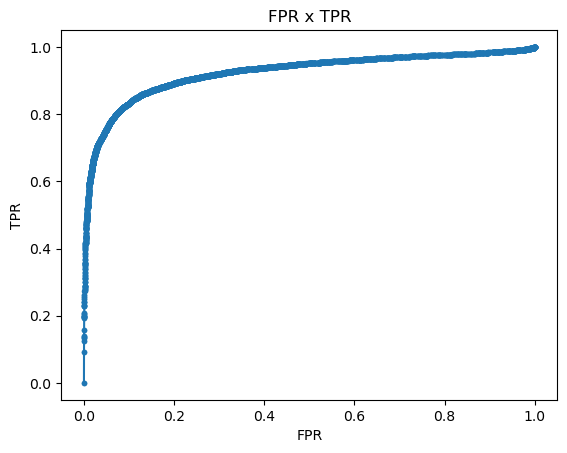

In [87]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR x TPR")

In [88]:
# Calcula a distância de cada ponto ao ideal (0,1)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)

# Encontra o índice do menor valor (ponto mais próximo de (0, 1))
best_index = np.argmin(distances)

# Obtém o threshold correspondente
best_threshold = thresholds[best_index]

print(f"O melhor threshold é: {best_threshold}")

O melhor threshold é: 0.47663115813727835


Threshold que equilibra TPR e 1-FPR: 0.4252534647800439


C:\Users\Luigi\AppData\Local\Temp\ipykernel_12300\3075659938.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(thresholds, tpr, 'b--', label='True Posite Rate', color='r')
C:\Users\Luigi\AppData\Local\Temp\ipykernel_12300\3075659938.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(thresholds, 1-fpr, 'b--', label='False Posite Rate', color='b')


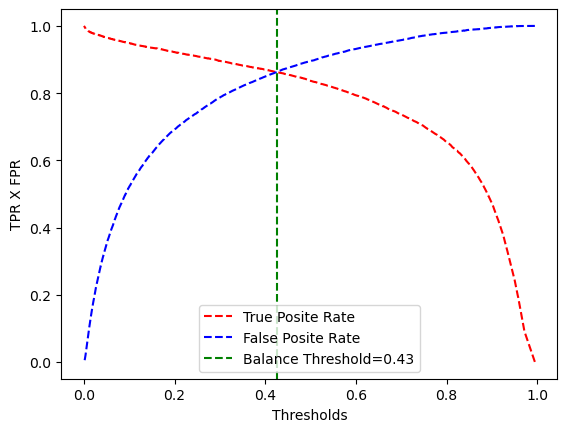

In [89]:
# Calcula a diferença entre TPR e (1 - FPR)
differences = np.abs(tpr - (1 - fpr))

# Encontra o índice onde a diferença é mínima
balance_index = np.argmin(differences)

# Threshold correspondente
balance_threshold = thresholds[balance_index]

print(f"Threshold que equilibra TPR e 1-FPR: {balance_threshold}")

# Plotagem com a linha do threshold balanceado
plt.plot(thresholds, tpr, 'b--', label='True Posite Rate', color='r')
plt.plot(thresholds, 1-fpr, 'b--', label='False Posite Rate', color='b')
plt.xlabel('Thresholds')
plt.ylabel('TPR X FPR')
plt.axvline(balance_threshold, 0, 1, color='green', linestyle='--', label=f'Balance Threshold={balance_threshold:.2f}')
plt.legend()
plt.show()

In [90]:
y_prob = model.predict_proba(X_val)[:, 1]
y_pred = (y_prob >= 0.42).astype(int)

In [91]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Exibindo os resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8615463818012162
Precision: 0.8629094372743666
Recall: 0.8615463818012162
F1 Score: 0.8618687871157998


In [97]:
# Agrupando os dados de train e val para validar o teste
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

In [98]:
#model
model = lm.LogisticRegression(solver='lbfgs', random_state=42)

#fit
model.fit(X_train_final, y_train_final)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.42).astype(int)


c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# teste training
print('accuracy = {}, precision = {}, recall = {}, f1 = {}'.format(accuracy, precision, recall, f1))

accuracy = 0.8364809021743328, precision = 0.837946057340676, recall = 0.8364809021743328, f1 = 0.8368350228831102


# Dados

In [3]:
#database Regressao
X_test = pd.read_csv('database/Regressao/X_test.csv')
X_train = pd.read_csv('database/Regressao/X_training.csv')
X_val = pd.read_csv('database/Regressao/X_validation.csv')
y_test = pd.read_csv('database/Regressao/y_test.csv')
y_train = pd.read_csv('database/Regressao/y_training.csv')
y_val = pd.read_csv('database/Regressao/y_val.csv')

# Linear Regression

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = lr_model.predict(X_train)
y_pred

array([[51.09989007],
       [52.58539717],
       [53.18206633],
       ...,
       [42.51230742],
       [49.28363461],
       [53.28139895]])

In [58]:
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)

In [59]:
#training data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.04605830473391903, MSE: 455.99611182562677, RMSE: 21.35406546364478, MAE: 16.998249066011095, MAPE: 8.653185943804512


In [60]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)

In [61]:
r2 = mt.r2_score(y_val, y_pred)
mse = mt.mean_squared_error(y_val, y_pred)
rmse = mt.root_mean_squared_error(y_val, y_pred)
mae = mt.mean_absolute_error(y_val, y_pred)
mape = mt.mean_absolute_percentage_error(y_val, y_pred)

In [62]:
#val data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.03992483038154071, MSE: 458.4470418439312, RMSE: 21.41137645841414, MAE: 17.039753759960327, MAPE: 8.682541883735295


In [63]:
# Agrupando os dados de train e val para validar o teste
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

In [64]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train_final)
y_pred = lr_model.predict(X_test)

In [65]:
r2 = mt.r2_score(y_test, y_pred)
mse = mt.mean_squared_error(y_test, y_pred)
rmse = mt.root_mean_squared_error(y_test, y_pred)
mae = mt.mean_absolute_error(y_test, y_pred)
mape = mt.mean_absolute_percentage_error(y_test, y_pred)

In [66]:
#val data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.05116551777115064, MSE: 461.9884353525593, RMSE: 21.4939162404751, MAE: 17.144197086987703, MAPE: 8.531355027820084


# Decision Tree Regressor


In [67]:
 #definition
model = tr.DecisionTreeRegressor()
#fit
model.fit(X_train, y_train)
#performance
y_pred = model.predict(X_train)

In [68]:
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)

In [69]:
#training data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.9917566957405923, MSE: 3.940402971731975, RMSE: 1.9850448286454327, MAE: 0.21409852496986279, MAPE: 0.08262787375974134


Text(0, 0.5, 'RMSE')

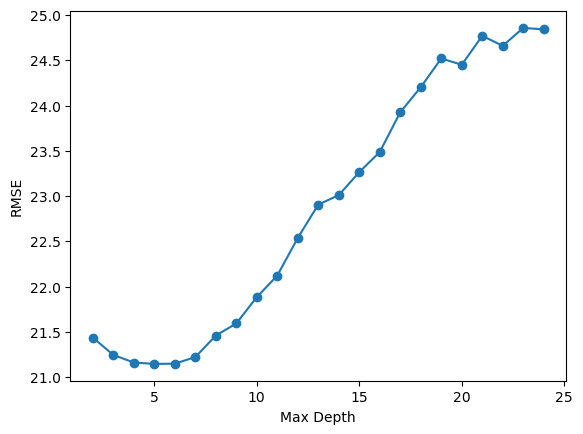

In [70]:
max_depth = list()

for i in range(2,25):
    #definition
    model = tr.DecisionTreeRegressor(random_state=42, max_depth=i)
    #fit
    model.fit(X_train, y_train)

    #performance
    y_pred = model.predict(X_val)

    mse = mt.mean_squared_error(y_val, y_pred)

    rmse = np.sqrt(mse)
    max_depth.append(rmse)

plt.plot(range(2,25), max_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

In [71]:
model = tr.DecisionTreeRegressor(random_state=42, max_depth=4)
#fit
model.fit(X_train, y_train)
#performance
y_pred = model.predict(X_val)

In [72]:
r2 = mt.r2_score(y_val, y_pred)
mse = mt.mean_squared_error(y_val, y_pred)
rmse = mt.root_mean_squared_error(y_val, y_pred)
mae = mt.mean_absolute_error(y_val, y_pred)
mape = mt.mean_absolute_percentage_error(y_val, y_pred)

In [73]:
#val data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.06216761663185333, MSE: 447.8258531271403, RMSE: 21.16189625546681, MAE: 16.849288338389194, MAPE: 8.536141474557683


In [78]:
# Agrupando os dados de train e val para validar o teste
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)



In [79]:
model = tr.DecisionTreeRegressor(random_state=42, max_depth=11)
#fit
model.fit(X_train_final, y_train_final)
#performance
y_pred = model.predict(X_test)

In [80]:
r2 = mt.r2_score(y_test, y_pred)
mse = mt.mean_squared_error(y_test, y_pred)
rmse = mt.root_mean_squared_error(y_test, y_pred)
mae = mt.mean_absolute_error(y_test, y_pred)
mape = mt.mean_absolute_percentage_error(y_test, y_pred)

In [81]:
#test data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.07611470915092178, MSE: 449.84064972215464, RMSE: 21.209447180965245, MAE: 16.325653953172235, MAPE: 6.765345522302062


# Polinomial Regression


In [4]:
poly = pp.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform( X_train )
model = lm.LinearRegression()
model.fit(X_poly, y_train)
y_pred = model.predict(X_poly)

In [5]:
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)

In [6]:
#training data
print('R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

R2: 0.09419491057528084, MSE: 432.9862096386579, RMSE: 20.80832068280999, MAE: 16.458031755824436, MAPE: 8.350539820928136


In [13]:
degrees = [1, 2, 3]
coefs = []
intercepts = []
preds = []
dicionario = dict()
for i in degrees:
    # features
    poly_features = pp.PolynomialFeatures( degree=i, include_bias=False )
    X_poly = poly_features.fit_transform( X_train )
    # model training
    model = lm.LinearRegression()
    model.fit( X_poly, y_train )
    # model predict
    yhat = model.predict( X_poly )
    preds.append( yhat )
    dicionario[i] = mt.mean_squared_error(y_train, yhat)

In [14]:
dicionario

{1: 455.99611182562677, 2: 432.9862096386579, 3: 404.198949663241}

# Lasso, Ridge, ElasticNet and Ransac

In [18]:
#modeling


#Lasso L1( Tende a zerar os parametros )
lasso = lm.Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_train)
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)
#training data
print('Lasso - R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

# Ridge L2 (smoothing - amenizacao dos parametros)
ridge = lm.Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_train)
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)
#training data
print('Ridge - R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

# Elasticnet L1&l2
elastic_net = lm.ElasticNet(alpha=10, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred=elastic_net.predict(X_train)
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)
#training data
print('Elastic Net - R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))

# RAMSAC (Ignora os outliers)
ransac = lm.RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred=ransac.predict(X_train)
r2 = mt.r2_score(y_train, y_pred)
mse = mt.mean_squared_error(y_train, y_pred)
rmse = mt.root_mean_squared_error(y_train, y_pred)
mae = mt.mean_absolute_error(y_train, y_pred)
mape = mt.mean_absolute_percentage_error(y_train, y_pred)
#training data
print('Ramsac - R2: {}, MSE: {}, RMSE: {}, MAE: {}, MAPE: {}'.format(r2,mse,rmse,mae,mape))


Lasso - R2: 0.0, MSE: 478.012559979818, RMSE: 21.863498347241183, MAE: 17.3650904457618, MAPE: 8.742212844953096
Ridge - R2: 0.04600882706503018, MSE: 456.0197627727942, RMSE: 21.35461923736394, MAE: 16.999134783661344, MAPE: 8.65524538830986
Elastic Net - R2: 0.0, MSE: 478.012559979818, RMSE: 21.863498347241183, MAE: 17.3650904457618, MAPE: 8.742212844953096
Ramsac - R2: -1.3151728093424055, MSE: 1106.6816813894302, RMSE: 33.26682553820593, MAE: 25.147090390865745, MAPE: 10.187553981936437


# Dados Clusterizacao

In [42]:
#database Clusterizacao
X = pd.read_csv('database/Clusterizacao/X_dataset.csv')

# Kmeans

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_clusters=[i for i in range(2,11)]
n_list = list()

for i in n_clusters:
    kmeans = ct.KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        random_state=42
        ) 


    labels = kmeans.fit_predict(X_scaled)
    sil_avg = mt.silhouette_score(X_scaled, labels)
    n_list.append(sil_avg)

    print('For n_cluster = {}, the average silhouette_score = {}'.format(i, sil_avg))

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

For n_cluster = 2, the average silhouette_score = 0.26831340971052126
For n_cluster = 3, the average silhouette_score = 0.2848589191898986
For n_cluster = 4, the average silhouette_score = 0.25173343011696475
For n_cluster = 5, the average silhouette_score = 0.2450681996584112
For n_cluster = 6, the average silhouette_score = 0.2383998216133732
For n_cluster = 7, the average silhouette_score = 0.18821768960113827
For n_cluster = 8, the average silhouette_score = 0.1746287447818147
For n_cluster = 9, the average silhouette_score = 0.1425981866064833
For n_cluster = 10, the average silhouette_score = 0.12961787834566654


c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Silhouette Score Average')

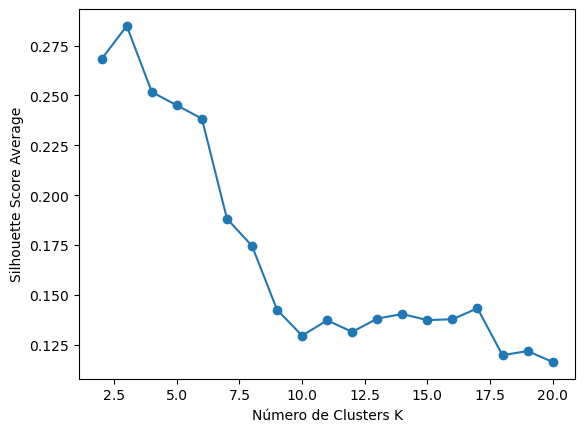

In [36]:
plt.plot(n_clusters, n_list, marker='o')
plt.xlabel('Número de Clusters K')
plt.ylabel('Silhouette Score Average')

In [39]:
import numpy as np
k=2

ss_list = []

clusters = np.arange(2,11,1)
for k in clusters:

    #define
    model = ct.KMeans(
        n_clusters=k,
        init='random',
        n_init=10,
        random_state=0
        ) 

    #fit
    labels = model.fit_predict(X)


    #performance
    ss = mt.silhouette_score( X, labels)
    ss_list.append(ss)
    print('For n_cluster = {}, the average silhouette_score = {}'.format(k, ss))



c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

For n_cluster = 2, the average silhouette_score = 0.213219480988304
For n_cluster = 3, the average silhouette_score = 0.2331050172234707
For n_cluster = 4, the average silhouette_score = 0.2184278488578188
For n_cluster = 5, the average silhouette_score = 0.18746853007839204
For n_cluster = 6, the average silhouette_score = 0.1979852621879627
For n_cluster = 7, the average silhouette_score = 0.21728298677207455
For n_cluster = 8, the average silhouette_score = 0.18297094267171113
For n_cluster = 9, the average silhouette_score = 0.18603557273452226
For n_cluster = 10, the average silhouette_score = 0.18295061444904823


c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Silhouette Score Avg')

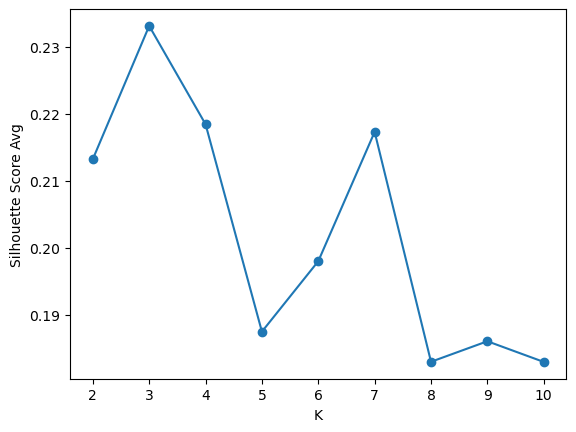

In [40]:
plt.plot(clusters, ss_list, marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score Avg')

In [41]:
kmeans = ct.KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    random_state=42
    ) 
labels = kmeans.fit_predict(X_scaled)
sil_avg = mt.silhouette_score(X_scaled, labels)
sil_avg

c:\Users\Luigi\anaconda3\envs\git\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.2848589191898986

# AffinityPropagation

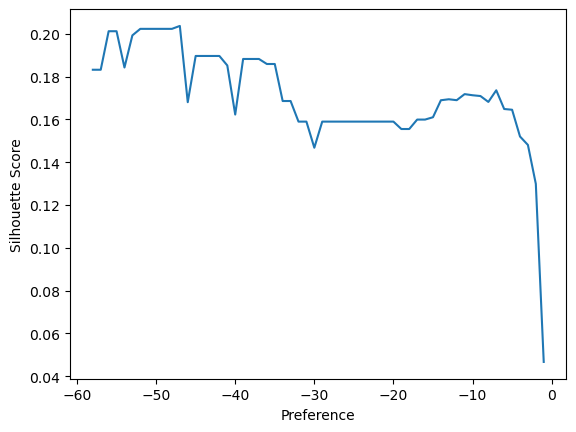

<Figure size 640x480 with 0 Axes>

In [44]:
p=np.arange(-1, -60, -1)
ss_list = list()

for i in range(len(p)):
    #print('Preference value: {}'.format(p[i]))
    model = AffinityPropagation(preference=p[i])
    #training
    model.fit(X)
    #fit - clustering
    labels = model.predict(X)

    #performance
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)

    #plot
    plt.plot(p[:i], ss_list[:i])
    plt.xlabel('Preference')
    plt.ylabel('Silhouette Score')
    display.clear_output(wait=True)
    plt.show()
    plt.gcf()
    time.sleep(0.5)

In [45]:
max_index = ss_list.index(max(ss_list))


p_best = p[max_index]
af = AffinityPropagation(preference=p_best)
af.fit(X)
labels = af.predict(X)

In [46]:
print('Número de Clusters: {} '.format(len(np.unique(labels))))

Número de Clusters: 7 
